In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime 
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

pd.set_option('precision', 2)

In [2]:
start = datetime(2017, 1, 1)
end = datetime.now()
progection_date = '2019-03-31'

dj_list=['^GSPC','^IXIC']
df_list = []

    
stuff = []
for stock in dj_list:
    sdata = web.get_data_yahoo(stock, start=start, end=end)[['Adj Close']]
    stuff.append(sdata['Adj Close'])

combo = pd.concat(stuff, axis = 1)    

In [3]:
combo.columns = ['S&P500','Nasdaq']
combo.tail()

,S&P500,Nasdaq
Date,,
2019-01-07,2549.69,6823.47
2019-01-08,2574.41,6897.00
2019-01-09,2584.96,6957.08
2019-01-10,2596.64,6986.07
2019-01-11,2596.26,6971.48


In [4]:
combo_returns = np.log(combo/combo.shift())
mean_return_rolling= combo_returns.rolling(252).mean()
combo_vol = round(combo_returns.rolling(252).std() * np.sqrt(252)*100,2)

In [5]:
combo_vol.tail()

,S&P500,Nasdaq
Date,,
2019-01-07,17.56,21.53
2019-01-08,17.57,21.54
2019-01-09,17.57,21.56
2019-01-10,17.58,21.56
2019-01-11,17.58,21.56


In [6]:
x= len(pd.date_range(pd.datetime.today(),'2019-03-31', freq='B'))
x

55

In [7]:
price_mean = np.round(combo['S&P500'].mean())
vy = (combo.iloc[-1,0] * (combo_vol.iloc[-1,0]/100) * np.sqrt(x/252)).round(2)
vyl = combo.iloc[-1,0] - (vy*2.5)
vyh = combo.iloc[-1,0] + (vy*2.5)

In [8]:
progection = pd.date_range(combo.index[-1],'2019-03-31', freq='B')
progection_data = pd.DataFrame(index=progection)
progection_data['price'] = combo.iloc[-1,0]
progection_data['len'] = np.arange(len(progection)) +1
progection_data['lower2'] = combo.iloc[-1,0] \
- (combo.iloc[-1,0] * (combo_vol.iloc[-1,0]/100) * np.sqrt(progection_data['len'] /252)*2).round(2)
progection_data['lower'] = combo.iloc[-1,0] \
- (combo.iloc[-1,0] * (combo_vol.iloc[-1,0]/100) * np.sqrt(progection_data['len'] /252)).round(2)
progection_data['higher'] = combo.iloc[-1,0] \
+ (combo.iloc[-1,0] * (combo_vol.iloc[-1,0]/100) * np.sqrt(progection_data['len'] /252)).round(2)
progection_data['higher2'] = combo.iloc[-1,0] \
+ (combo.iloc[-1,0] * (combo_vol.iloc[-1,0]/100) * np.sqrt(progection_data['len'] /252)*2).round(2)

progection_data.head()

,price,len,lower2,lower,higher,higher2
2019-01-11,2596.26,1,2538.76,2567.51,2625.01,2653.76
2019-01-14,2596.26,2,2514.94,2555.60,2636.92,2677.58
2019-01-15,2596.26,3,2496.66,2546.46,2646.06,2695.86
2019-01-16,2596.26,4,2481.25,2538.76,2653.76,2711.27
2019-01-17,2596.26,5,2467.68,2531.97,2660.55,2724.84


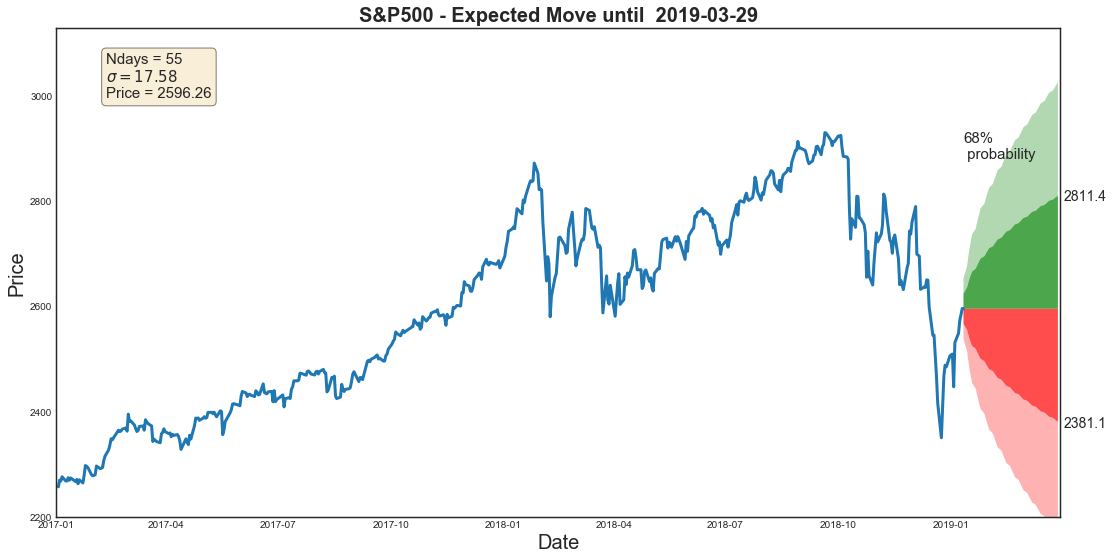

In [9]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111)

new_tick_locations = np.array([np.round(progection_data.iloc[-1,3],1), np.round(progection_data.iloc[-1,4],1)])

YLIM = [2200, vyh,]


ax.plot(combo.index,combo.loc[:,'S&P500'], lw=3);
plt.xlabel("Date", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.title("S&P500 - Expected Move until  " + str(progection_data.index[-1].date()), fontsize=20,fontweight='bold')
ax.set_xlim(start ,progection_date)
ax.set_ylim(2200,vyh)

ax.fill_between(progection_data.index,progection_data.iloc[:,0],progection_data.iloc[:,3], facecolor='red', alpha=0.7)
ax.fill_between(progection_data.index, progection_data.iloc[:,0],progection_data.iloc[:,4], facecolor='green', alpha=0.7);
ax.fill_between(progection_data.index,progection_data.iloc[:,3],progection_data.iloc[:,2], facecolor='red', alpha=0.3)
ax.fill_between(progection_data.index, progection_data.iloc[:,4],progection_data.iloc[:,5], facecolor='green', alpha=0.3);



ax2 = ax.twinx()
ax2.set_ylim(2200,vyh)
ax2.set_yticks(new_tick_locations)
ax2.set_yticklabels(new_tick_locations, rotation=0, fontsize=14);
ax2.text(progection_data.index[-len(progection_data.index)], 2880, '68%\n probability', fontsize=15)

n = x
price = combo.iloc[-1,0]
sigma = combo_vol.iloc[-1,0]
textstr = 'Ndays = %.f\n$\sigma=%.2f$\nPrice = %.2f'%(n, sigma, price)

ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props);